### Business Problem:

*  To understand about the factors which are important in graduate admissions and 
   how these factors are interrelated among themselves which will help Educational 
   Institutions to predict one's chances of admission given the rest of the variables.

### Column Profiling:
* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

### Overview of the notebook:
* Missing and Duplicacy Check
* Exploratory Data Analysis
   * Univariate Analysis
   * Bivariate Analysis
* Module Building   

#### Importing Data Into Dataframe

In [216]:
# imort datase
import pandas as pd
 
data = pd.read_csv(r'C:/Users/amarc/Downloads/IML/Dataset/Admission_Predict.csv')
data

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


#### Missing and Duplicacy Check

In [217]:
 data.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

#### Summary
* No missing values

### Exploratory Data Analysis

In [218]:
#Dropping the unique row Identifier - which is Serial No.

data = data.drop('Serial No.', axis = 1)
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Identification of variables and data types:

In [219]:
data.shape

(400, 8)

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          400 non-null    int64  
 1   TOEFL_Score        400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


#### Analysing the basic metrics:

In [221]:
data.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [222]:
numerical_var_colm = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']

for i in numerical_var_colm:
    print(f" Unique value count in {i} is {data[i].nunique()}")

 Unique value count in GRE_Score is 49
 Unique value count in TOEFL_Score is 29
 Unique value count in University_Rating is 5
 Unique value count in SOP is 9
 Unique value count in LOR is 9
 Unique value count in CGPA is 168
 Unique value count in Research is 2
 Unique value count in Chance_of_Admit is 60


In [223]:
disc_var_colm = ['University_Rating', 'SOP', 'LOR','Research']
for i in disc_var_colm:
    print(f" Unique values in {i} are {data[i].unique()}")

 Unique values in University_Rating are [4 3 2 5 1]
 Unique values in SOP are [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
 Unique values in LOR are [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
 Unique values in Research are [1 0]


### Univariate Analysis

In [224]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

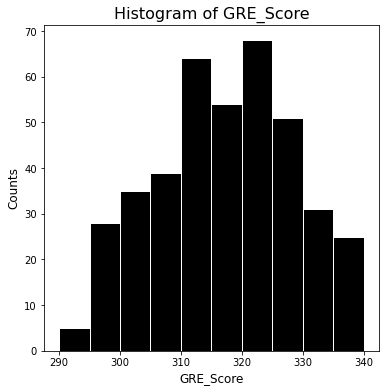

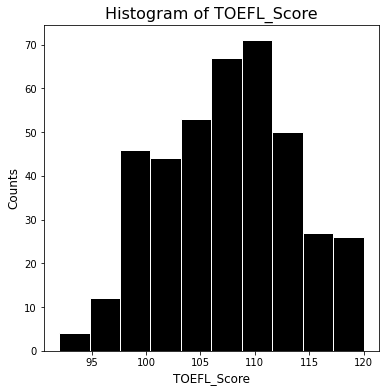

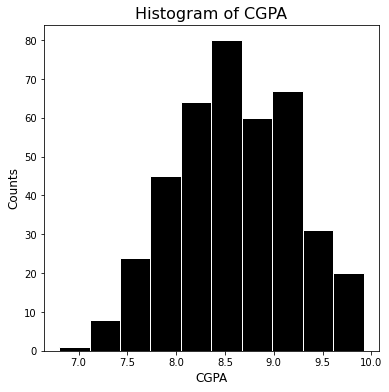

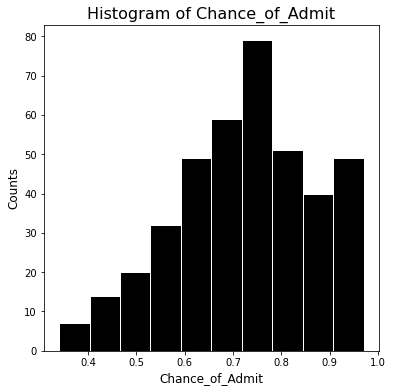

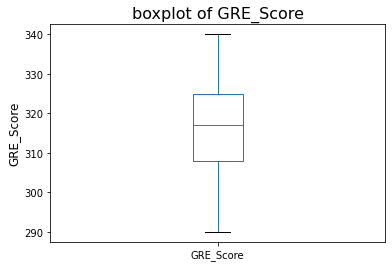

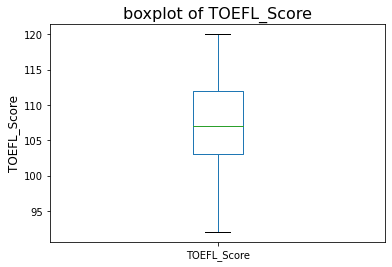

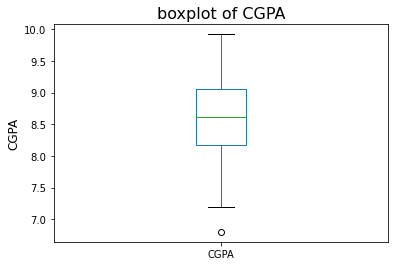

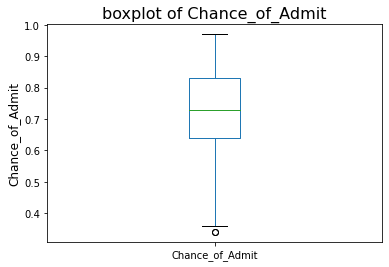

In [225]:
numerical_var_colm = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit']

for i in numerical_var_colm:
    data.hist(column=i,grid=False,figsize=(6,6),color= 'black',edgecolor='white',bins=10)

    
    plt.xlabel(i,fontsize = 12)
    plt.ylabel('Counts',fontsize = 12)
    plt.title( f'Histogram of {i}',fontsize = 16)
    plt.show()
    
for i in numerical_var_colm:
    data.boxplot(column=i,grid=False)
    plt.ylabel(i,fontsize = 12)
    plt.title( f'boxplot of {i}',fontsize = 16)
    plt.show()

In [226]:
disc_var_colm = ['University_Rating', 'SOP', 'LOR', 'Research']

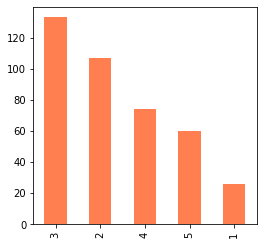

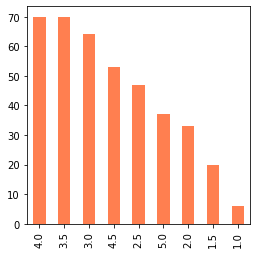

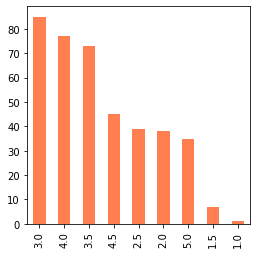

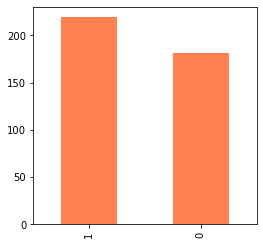

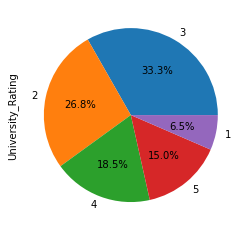

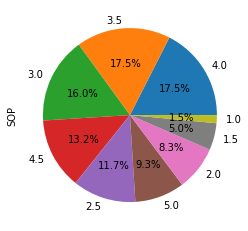

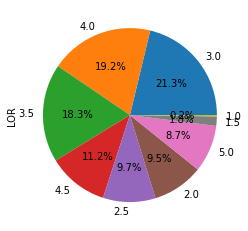

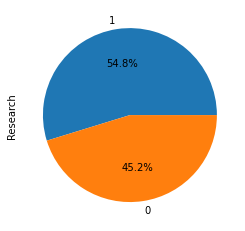

In [227]:
for i in disc_var_colm:
    data[i].value_counts().plot(kind='bar',figsize=(4,4),color='coral',fontsize=10)
    plt.show()
    
for i in disc_var_colm:
    data[i].value_counts().plot(kind='pie',figsize=(4,4),fontsize=10, autopct='%1.1f%%')
    plt.show()

#### Data Preparation

In [228]:
data['GRE_Score'].sort_values().head()

117    290
377    290
168    293
272    294
79     294
Name: GRE_Score, dtype: int64

In [229]:
data_new = data.copy()
bins = [290,300,310,320,330,340]
labels =["290-300","300-310","310-320","320-330","330-340"]
data_new['GRE_Score_bins'] = pd.cut(data_new['GRE_Score'], bins,labels=labels)

In [230]:
data_new['TOEFL_Score'].sort_values().head()

368    92
79     93
28     93
347    94
272    95
Name: TOEFL_Score, dtype: int64

In [231]:
bins = [90,100,110,120]
labels =['90-100','100-110','110-120']
data_new['TOEFL_Score_bins'] = pd.cut(data_new['TOEFL_Score'], bins,labels=labels)

In [232]:
data_new['CGPA'].sort_values().head()

58     6.80
28     7.20
348    7.25
118    7.28
29     7.30
Name: CGPA, dtype: float64

In [233]:
bins = [6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0]
labels =['6.5-7.0','7.0-7.5','7.5-8.0','8.0-8.5','8.5-9.0','9.0-9.5','Above 9.5']
data_new['CGPA_bins'] = pd.cut(data_new['CGPA'], bins,labels=labels)

In [234]:
data_new.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,GRE_Score_bins,TOEFL_Score_bins,CGPA_bins
0,337,118,4,4.5,4.5,9.65,1,0.92,330-340,110-120,Above 9.5
1,324,107,4,4.0,4.5,8.87,1,0.76,320-330,100-110,8.5-9.0
2,316,104,3,3.0,3.5,8.00,1,0.72,310-320,100-110,7.5-8.0
3,322,110,3,3.5,2.5,8.67,1,0.80,320-330,100-110,8.5-9.0
4,314,103,2,2.0,3.0,8.21,0,0.65,310-320,100-110,8.0-8.5


In [235]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE_Score          400 non-null    int64   
 1   TOEFL_Score        400 non-null    int64   
 2   University_Rating  400 non-null    int64   
 3   SOP                400 non-null    float64 
 4   LOR                400 non-null    float64 
 5   CGPA               400 non-null    float64 
 6   Research           400 non-null    int64   
 7   Chance_of_Admit    400 non-null    float64 
 8   GRE_Score_bins     398 non-null    category
 9   TOEFL_Score_bins   400 non-null    category
 10  CGPA_bins          400 non-null    category
dtypes: category(3), float64(4), int64(4)
memory usage: 27.0 KB


In [236]:
list1 = ['University_Rating', 'SOP','Research','LOR']

------------ UNIVERSITY_RATING ------------------
Research            0   1
University_Rating        
1                  21   5
2                  75  32
3                  62  71
4                  15  59
5                   8  52
 
Research                  0         1
University_Rating                    
1                  0.807692  0.192308
2                  0.700935  0.299065
3                  0.466165  0.533835
4                  0.202703  0.797297
5                  0.133333  0.866667


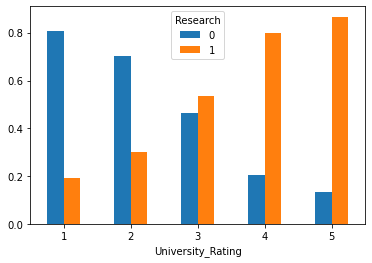

 
------------ SOP ------------------
Research   0   1
SOP             
1.0        5   1
1.5       17   3
2.0       27   6
2.5       33  14
3.0       34  30
3.5       27  43
4.0       21  49
4.5       12  41
5.0        5  32
 
Research         0         1
SOP                         
1.0       0.833333  0.166667
1.5       0.850000  0.150000
2.0       0.818182  0.181818
2.5       0.702128  0.297872
3.0       0.531250  0.468750
3.5       0.385714  0.614286
4.0       0.300000  0.700000
4.5       0.226415  0.773585
5.0       0.135135  0.864865


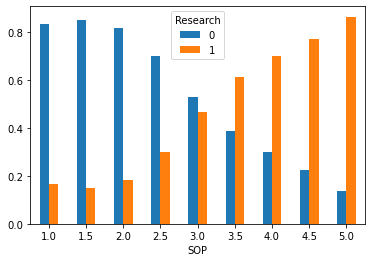

 
------------ LOR ------------------
Research   0   1
LOR             
1.0        1   0
1.5        5   2
2.0       29   9
2.5       29  10
3.0       45  40
3.5       35  38
4.0       24  53
4.5        7  38
5.0        6  29
 
Research         0         1
LOR                         
1.0       1.000000  0.000000
1.5       0.714286  0.285714
2.0       0.763158  0.236842
2.5       0.743590  0.256410
3.0       0.529412  0.470588
3.5       0.479452  0.520548
4.0       0.311688  0.688312
4.5       0.155556  0.844444
5.0       0.171429  0.828571


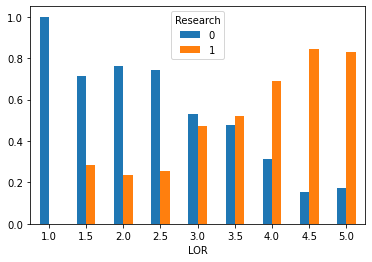

 
------------ UNIVERSITY_RATING ------------------
SOP                1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
University_Rating                                             
1                    5    8    7    2    2    2    0    0    0
2                    1   10   15   35   25    9    9    3    0
3                    0    0   10    9   30   51   26    5    2
4                    0    2    1    1    5    6   21   27   11
5                    0    0    0    0    2    2   14   18   24
 
SOP                     1.0       1.5       2.0       2.5       3.0       3.5  \
University_Rating                                                               
1                  0.192308  0.307692  0.269231  0.076923  0.076923  0.076923   
2                  0.009346  0.093458  0.140187  0.327103  0.233645  0.084112   
3                  0.000000  0.000000  0.075188  0.067669  0.225564  0.383459   
4                  0.000000  0.027027  0.013514  0.013514  0.067568  0.081081   
5                  

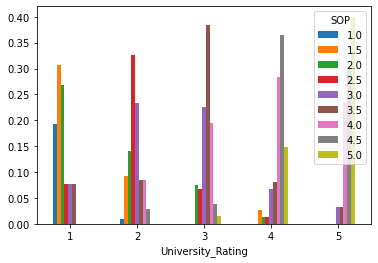

 
------------ RESEARCH ------------------
SOP       1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
Research                                             
0           5   17   27   33   34   27   21   12    5
1           1    3    6   14   30   43   49   41   32
 
SOP            1.0       1.5       2.0       2.5       3.0       3.5  \
Research                                                               
0         0.027624  0.093923  0.149171  0.182320  0.187845  0.149171   
1         0.004566  0.013699  0.027397  0.063927  0.136986  0.196347   

SOP            4.0       4.5       5.0  
Research                                
0         0.116022  0.066298  0.027624  
1         0.223744  0.187215  0.146119  


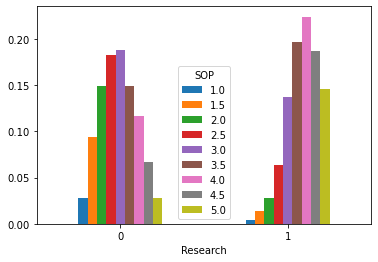

 
------------ LOR ------------------
SOP  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
LOR                                             
1.0    1    0    0    0    0    0    0    0    0
1.5    1    1    2    2    1    0    0    0    0
2.0    2   13    5    9    7    1    1    0    0
2.5    2    3   14    6    6    6    2    0    0
3.0    0    2    7   18   20   25   10    3    0
3.5    0    1    3    7   21   15   15    9    2
4.0    0    0    2    4    7   19   18   21    6
4.5    0    0    0    1    1    2   16   14   11
5.0    0    0    0    0    1    2    8    6   18
 
SOP       1.0       1.5       2.0       2.5       3.0       3.5       4.0  \
LOR                                                                         
1.0  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.5  0.142857  0.142857  0.285714  0.285714  0.142857  0.000000  0.000000   
2.0  0.052632  0.342105  0.131579  0.236842  0.184211  0.026316  0.026316   
2.5  0.051282  0.076923  0.358974  0

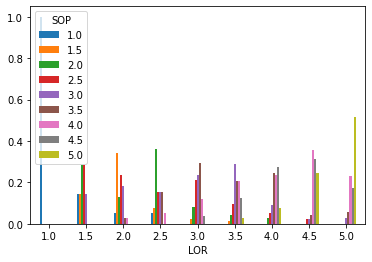

 
------------ SOP ------------------
University_Rating  1   2   3   4   5
SOP                                 
1.0                5   1   0   0   0
1.5                8  10   0   2   0
2.0                7  15  10   1   0
2.5                2  35   9   1   0
3.0                2  25  30   5   2
3.5                2   9  51   6   2
4.0                0   9  26  21  14
4.5                0   3   5  27  18
5.0                0   0   2  11  24
 
University_Rating         1         2         3         4         5
SOP                                                                
1.0                0.833333  0.166667  0.000000  0.000000  0.000000
1.5                0.400000  0.500000  0.000000  0.100000  0.000000
2.0                0.212121  0.454545  0.303030  0.030303  0.000000
2.5                0.042553  0.744681  0.191489  0.021277  0.000000
3.0                0.031250  0.390625  0.468750  0.078125  0.031250
3.5                0.028571  0.128571  0.728571  0.085714  0.028571
4.0      

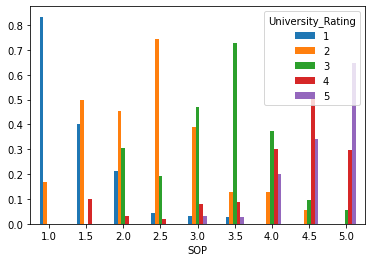

 
------------ RESEARCH ------------------
University_Rating   1   2   3   4   5
Research                             
0                  21  75  62  15   8
1                   5  32  71  59  52
 
University_Rating         1         2         3         4         5
Research                                                           
0                  0.116022  0.414365  0.342541  0.082873  0.044199
1                  0.022831  0.146119  0.324201  0.269406  0.237443


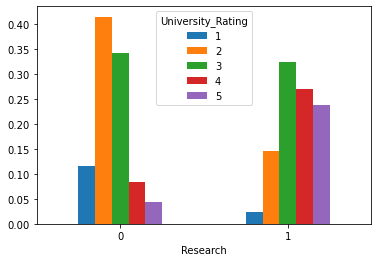

 
------------ LOR ------------------
University_Rating   1   2   3   4   5
LOR                                  
1.0                 1   0   0   0   0
1.5                 4   2   1   0   0
2.0                11  21   5   1   0
2.5                 4  18  12   5   0
3.0                 5  30  42   6   2
3.5                 1  22  33   9   8
4.0                 0  14  26  22  15
4.5                 0   0   9  21  15
5.0                 0   0   5  10  20
 
University_Rating         1         2         3         4         5
LOR                                                                
1.0                1.000000  0.000000  0.000000  0.000000  0.000000
1.5                0.571429  0.285714  0.142857  0.000000  0.000000
2.0                0.289474  0.552632  0.131579  0.026316  0.000000
2.5                0.102564  0.461538  0.307692  0.128205  0.000000
3.0                0.058824  0.352941  0.494118  0.070588  0.023529
3.5                0.013699  0.301370  0.452055  0.123288  0.10958

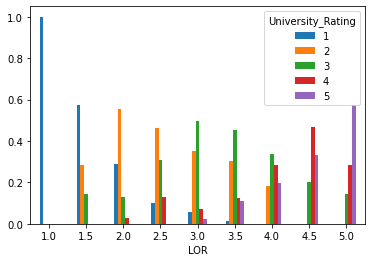

 
------------ UNIVERSITY_RATING ------------------
LOR                1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
University_Rating                                             
1                    1    4   11    4    5    1    0    0    0
2                    0    2   21   18   30   22   14    0    0
3                    0    1    5   12   42   33   26    9    5
4                    0    0    1    5    6    9   22   21   10
5                    0    0    0    0    2    8   15   15   20
 
LOR                     1.0       1.5       2.0       2.5       3.0       3.5  \
University_Rating                                                               
1                  0.038462  0.153846  0.423077  0.153846  0.192308  0.038462   
2                  0.000000  0.018692  0.196262  0.168224  0.280374  0.205607   
3                  0.000000  0.007519  0.037594  0.090226  0.315789  0.248120   
4                  0.000000  0.000000  0.013514  0.067568  0.081081  0.121622   
5                  

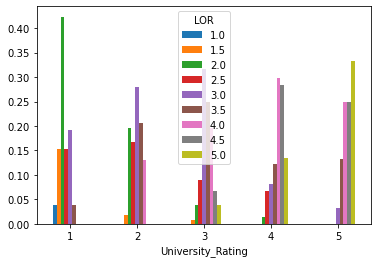

 
------------ SOP ------------------
LOR  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
SOP                                             
1.0    1    1    2    2    0    0    0    0    0
1.5    0    1   13    3    2    1    0    0    0
2.0    0    2    5   14    7    3    2    0    0
2.5    0    2    9    6   18    7    4    1    0
3.0    0    1    7    6   20   21    7    1    1
3.5    0    0    1    6   25   15   19    2    2
4.0    0    0    1    2   10   15   18   16    8
4.5    0    0    0    0    3    9   21   14    6
5.0    0    0    0    0    0    2    6   11   18
 
LOR       1.0       1.5       2.0       2.5       3.0       3.5       4.0  \
SOP                                                                         
1.0  0.166667  0.166667  0.333333  0.333333  0.000000  0.000000  0.000000   
1.5  0.000000  0.050000  0.650000  0.150000  0.100000  0.050000  0.000000   
2.0  0.000000  0.060606  0.151515  0.424242  0.212121  0.090909  0.060606   
2.5  0.000000  0.042553  0.191489  0

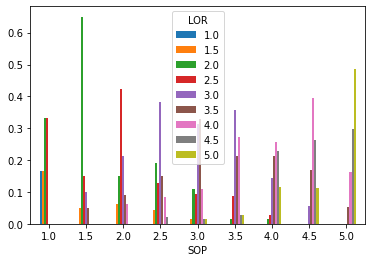

 
------------ RESEARCH ------------------
LOR       1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
Research                                             
0           1    5   29   29   45   35   24    7    6
1           0    2    9   10   40   38   53   38   29
 
LOR            1.0       1.5       2.0       2.5       3.0       3.5  \
Research                                                               
0         0.005525  0.027624  0.160221  0.160221  0.248619  0.193370   
1         0.000000  0.009132  0.041096  0.045662  0.182648  0.173516   

LOR            4.0       4.5       5.0  
Research                                
0         0.132597  0.038674  0.033149  
1         0.242009  0.173516  0.132420  


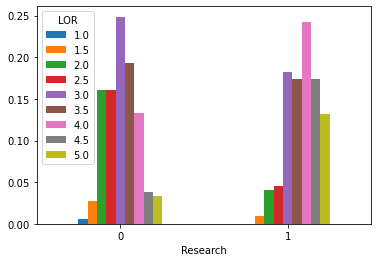

In [237]:
for cvar in list1:
    if cvar == 'Research':
        continue
    print('------------',cvar.upper(),'------------------')
    tab = pd.crosstab(data[cvar],columns=data.Research)
    print(tab)
    print(' ')
    rowtotal = tab.sum(axis =1)
    tab2 = tab.div(rowtotal,axis=0)
    print(tab2)
    tab2.plot.bar(rot=0)
    plt.show()
    print(' ')
    

for cvar in list1:
    if cvar == 'SOP':
        continue
    print('------------',cvar.upper(),'------------------')
    tab = pd.crosstab(data[cvar],columns=data.SOP)
    print(tab)
    print(' ')
    rowtotal = tab.sum(axis =1)
    tab2 = tab.div(rowtotal,axis=0)
    print(tab2)
    tab2.plot.bar(rot=0)
    plt.show()
    print(' ')

for cvar in list1:
    if cvar == 'University_Rating':
        continue
    print('------------',cvar.upper(),'------------------')
    tab = pd.crosstab(data[cvar],columns=data.University_Rating)
    print(tab)
    print(' ')
    rowtotal = tab.sum(axis =1)
    tab2 = tab.div(rowtotal,axis=0)
    print(tab2)
    tab2.plot.bar(rot=0)
    plt.show()
    print(' ')
    
for cvar in list1:
    if cvar == 'LOR':
        continue
    print('------------',cvar.upper(),'------------------')
    tab = pd.crosstab(data[cvar],columns=data.LOR)
    print(tab)
    print(' ')
    rowtotal = tab.sum(axis =1)
    tab2 = tab.div(rowtotal,axis=0)
    print(tab2)
    tab2.plot.bar(rot=0)
    plt.show()
    print(' ')
    
    

In [239]:
data = data.drop('University_Rating', axis = 1)

In [244]:
data = data.drop('SOP', axis = 1)

In [241]:
data = data.drop('LOR', axis = 1)

In [242]:
data = data.drop('Research', axis = 1)

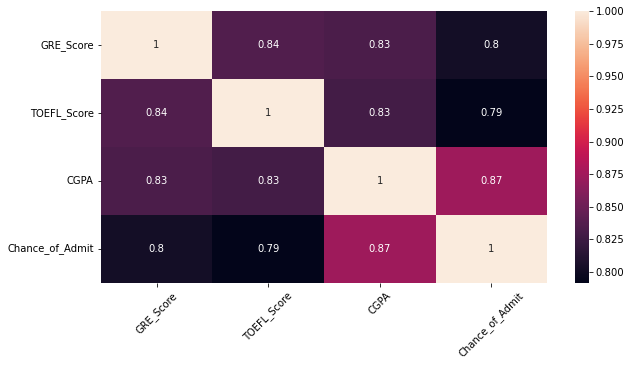

In [245]:
# Correaltion between numerical variables

plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(method="pearson"),annot = True)
plt.yticks(rotation = 360)
plt.xticks(rotation = 45)
plt.show()

* As We can See Chance of Admit is highly Correlated with GRE Score,Toefl Score and CGPA

### Linear Regression Module

In [189]:
import statsmodels.api as stm

In [190]:
x = data[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']]
y = data.Chance_of_Admit
X = stm.add_constant(x)

In [191]:
mod1 = stm.OLS(y,X).fit()

In [192]:
mod1.params

const                9.992007e-16
GRE_Score           -7.806256e-18
TOEFL_Score          1.257675e-17
University_Rating   -2.012279e-16
SOP                  4.857226e-17
LOR                 -4.510281e-17
CGPA                 3.330669e-16
Research             1.665335e-16
Chance_of_Admit      1.000000e+00
dtype: float64

In [193]:
#Errors
y - mod1.predict(X)

0     -2.442491e-15
1     -2.109424e-15
2     -2.109424e-15
3     -2.331468e-15
4     -2.109424e-15
           ...     
395   -2.442491e-15
396   -2.442491e-15
397   -2.442491e-15
398   -2.220446e-15
399   -2.553513e-15
Length: 400, dtype: float64

In [194]:
#Rss
np.sum((y-mod1.predict(X))**2)

1.9869464865133345e-27

In [195]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.996e+29
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:32:49   Log-Likelihood:                 12927.
No. Observations:                 400   AIC:                        -2.584e+04
Df Residuals:                     391   BIC:                        -2.580e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.992e-16   4.95e-15      0.202      0.840   -8.73e-15    1.07e-14
GRE_Score         -7.806e-18   2.14e-17     -0.366      0.715   -4.98e-17    3.42e-17
TOEFL_Score        1.258e-17   3.89e-17      0.324      0.746   -6.38e-17     8.9e-17
University_Rating -2.012e-16   1.69e-16     -1.191      0.234   -5.33e-16    1.31e-16
SOP                4.857e-17   1.97e-16      0.247      0.805   -3.38e-16    4.35e-16
LOR                -4.51e-17      2e-16     -0.226      0.822   -4.38e-16    3.48e-16
CGPA               3.331e-16   4.81e-16      0.692      0.489   -6.13e-16    1.28e-15
Research           1.665e-16   2.85e-16      0.585      0.559   -3.93e-16    7.26e-16
Chance_of_Admit       1.0000   1.79e-15    5.6e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        6.464   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                9.570
Skew:                          -0.021   Prob(JB):                      0.00835
Kurtosis:                       3.757   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""